In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
from utils import *

In [20]:
data = load_data('../../data/vehicle_claims/vehicle_claims_labeled.csv')
categorical_cols = ['Maker', ' Genmodel', 'Color', 'Bodytype', 'Engin_size', 'Gearbox', 'Fuel_type',
                        'Seat_num', 'Door_num', 'issue', 'issue_id', 'repair_complexity']


In [21]:
cols_to_remove = [' Genmodel_ID', 'Adv_year', 'Adv_month', 'Adv_day', 'breakdown_date', 'repair_date', 'category_anomaly']
X = remove_cols(data,cols_to_remove)
Y = get_labels(data, "vehicle_claims")

In [14]:
X_num = X[:50000]
Y = Y[:50000]
X_num = remove_cols(X_num, categorical_cols)

C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Numerical Cols**

In [7]:
X_num = normalize_cols(X_num)
X_num_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_num)

In [33]:
X_num["tsne_one"] = X_num_embedded[:,0]
X_num["tsne_two"] = X_num_embedded[:,1]
X_num["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

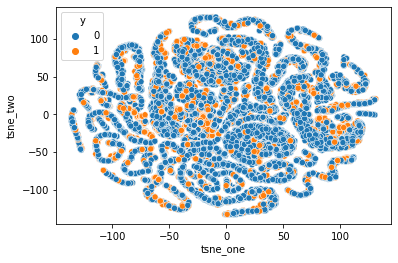

In [9]:
 sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_num,
    legend="full",
    alpha=1
)

**Label Encoding**

In [15]:
X_label = label_encoding(X, categorical_cols)
X_label = normalize_cols(X_label)
X_label = X_label[:50000]

In [16]:
X_label_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_label)

In [17]:
X_label["tsne_one"] = X_label_embedded[:,0]
X_label["tsne_two"] = X_label_embedded[:,1]
X_label["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

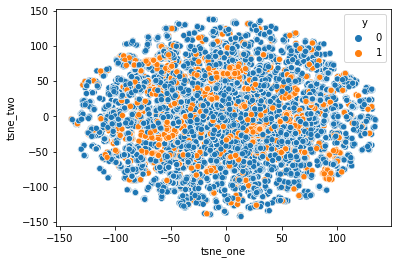

In [18]:
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_label,
    legend="full",
    alpha=1
)

**GEL Encoding**

In [22]:
X_gel = gel_encoding(X[:50000], categorical_cols)
X_gel = normalize_cols(X_gel)

C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
X_gel_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_gel)

In [24]:
X_gel["tsne_one"] = X_gel_embedded[:,0]
X_gel["tsne_two"] = X_gel_embedded[:,1]
X_gel["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

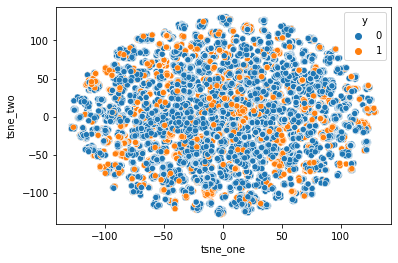

In [25]:
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_gel,
    legend="full",
    alpha=1
)

In [26]:
X_oh = X[:50000]
X_oh = one_hot_encoding(X_oh, categorical_cols)
X_oh = normalize_cols(X_oh)

C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
X_oh_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_oh)

In [28]:
X_oh["tsne_one"] = X_oh_embedded[:,0]
X_oh["tsne_two"] = X_oh_embedded[:,1]
X_oh["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

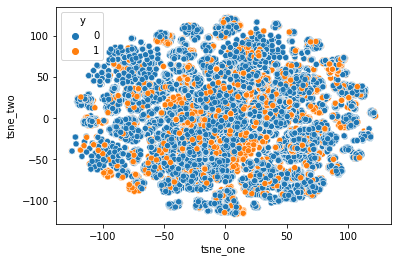

In [29]:
 sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_oh,
    legend="full",
    alpha=1
)

Text(0.5, 1.0, 'One hot Encoding')

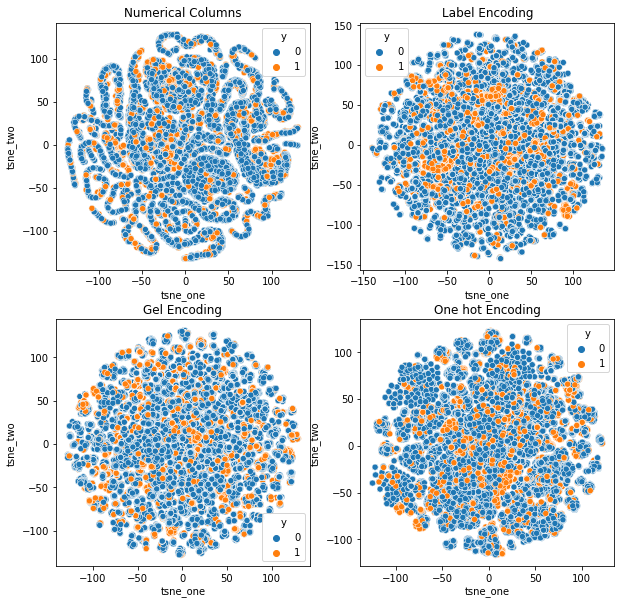

In [34]:
f, ax = plt.subplots(2,2, figsize = [10,10])
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_num,
    legend="full",
    alpha=1, ax= ax[0,0]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_label,
    legend="full",
    alpha=1, ax=ax[0,1]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_gel,
    legend="full",
    alpha=1, ax=ax[1,0]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_oh,
    legend="full",
    alpha=1, ax=ax[1,1]
)
ax[0][0].set_title("Numerical Columns")
ax[0][1].set_title("Label Encoding")
ax[1][0].set_title("Gel Encoding")
ax[1][1].set_title("One hot Encoding")

**Numerical Cols Importance**

In [42]:
data = load_data('../../data/vehicle_claims/vehicle_claims_labeled.csv')
df = remove_cols(data, categorical_cols)

In [43]:
df = remove_cols(df, cols_to_remove)

In [44]:
Y = get_labels(data, "vehicle_claims")
df["y"] = Y

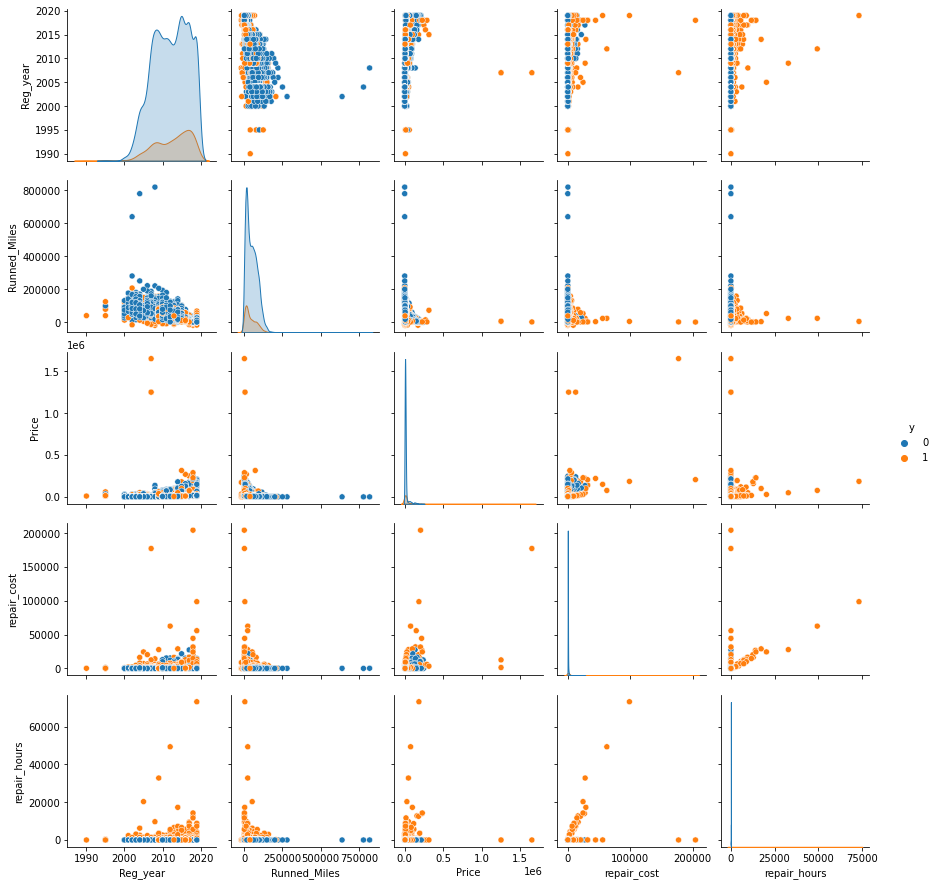

In [45]:
sns.pairplot(df[:10000], hue = "y")

<AxesSubplot:xlabel='repair_cost', ylabel='y'>

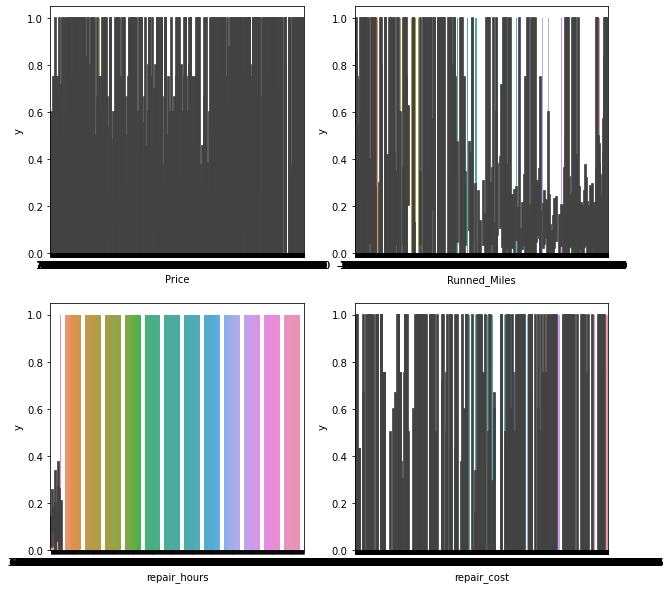

In [106]:
df = df[:10000]
f, ax = plt.subplots(2,2, figsize=[10,10])
sns.barplot(x='Price', y='y', data=df, ax=ax[0,0])
sns.barplot(x='Runned_Miles', y='y', data=df, ax=ax[0,1])
sns.barplot(x='repair_hours',y='y', data=df, ax=ax[1,0])
sns.barplot(x='repair_cost', y='y', data=df, ax=ax[1,1])

In [98]:
data = load_data('../../data/vehicle_claims_labeled.csv')
df1 = data[categorical_cols]
df1["y"] = Y

C:\Users\ajayc\AppData\Local\Temp/ipykernel_15752/2349853379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["y"] = Y


<AxesSubplot:xlabel='Gearbox', ylabel='y'>

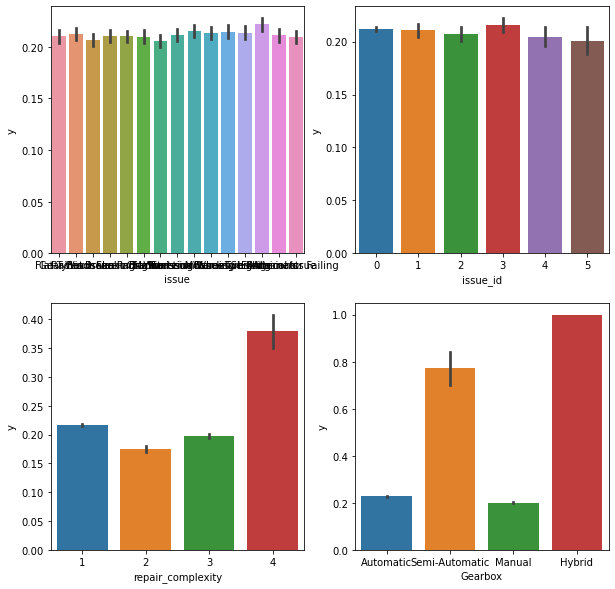

In [104]:
f, ax = plt.subplots(2,2, figsize=[10,10])
sns.barplot(x='issue', y='y', data=df1, ax=ax[0,0])
sns.barplot(x='issue_id', y='y', data=df1, ax=ax[0,1])
sns.barplot(x='repair_complexity',y='y', data=df1, ax=ax[1,0])
sns.barplot(x='Gearbox', y='y', data=df1, ax=ax[1,1])
#sns.barplot(x='Engin_size', y='y',data=df1, ax=ax[2,1])
#sns.barplot(x='Color', y='y', data=df1, ax=ax[2,0])
#plt.savefig('2.png')

In [37]:
print('*'   *   5)

*****


In [38]:
s = {2,2,3,4,5,6}

In [40]:
stats = {'a': -3000.6, 'b': -3000.3, 'c': -3000, 'd':-3000.9}
max(stats, key=stats.get)

'c'

In [46]:
func = lambda x,y : (x**y)
print(type(func(float(2),3)))

<class 'float'>


In [47]:
order_total = [399, 2399, 999]
try:
    for i in order_total:
        print(order_total[i + 1],end=" ")
except Exception as e:
    print("e",end=" ")
finally:
    print("Execution Complete",end=" ")

e Execution Complete 

In [48]:
def func(country):
     return [*country]
country={1: 'usa', 2: 'india', 3: 'china'}
print(func(country))

[1, 2, 3]


In [32]:
X_num

,Reg_year,Runned_Miles,Price,repair_cost,repair_hours
0,2000.0,60000,21500.0,395.000000,9.000000
1,2002.0,44000,28750.0,695.000000,6.000000
2,2002.0,55000,29999.0,89.999000,3.000000
3,2003.0,14000,34948.0,224.844000,6.000000
4,2003.0,61652,26555.0,75.933000,3.000000
...,...,...,...,...,...
49995,2014.0,131400,5750.0,211.750000,8.000000
49996,2013.0,27893,9271.0,132.710000,2.000000
49997,2005.0,80000,9995.0,25.997000,1.000000
49998,2005.0,103000,1500.0,545.000000,16.000000
